In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
import pandas as pd
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt 

In [2]:
# Importing the dataset
data = pd.read_csv("C:/Users/LENOVO/Downloads/CoronaTweetsSentimentAnalysis.csv")
data.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
536,537,45948,"Chicago, IL - USA",13-03-2020,"DONT FORGET TO BE POLITE TO OTHERS, ESPECIALLY...",Positive
146,147,45229,?,12-03-2020,Donnie touts #CoronaTaxCuts becoz of low oil ...,Negative
1458,1459,47670,Erth,14-03-2020,Stock prices increase after #TrumpPressConfere...,Positive
714,715,46301,Toronto,13-03-2020,"I went and bought a bunch of food today, not b...",Negative
583,584,46038,NaN,13-03-2020,Pretty sure I'm single handedly financing Pola...,Positive


In [3]:
data['Sentiment'].value_counts()

Negative    1041
Positive     947
Name: Sentiment, dtype: int64

In [4]:
#check for missing values
data.isna().sum()/data.shape[0]

UserName         0.000000
ScreenName       0.000000
Location         0.227364
TweetAt          0.000000
OriginalTweet    0.000000
Sentiment        0.000000
dtype: float64

In [5]:
data.shape

(1988, 6)

In [6]:
df = data[['Sentiment','OriginalTweet']]

In [7]:
df.dropna(inplace=True)

<ipython-input-7-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
df.shape

(1988, 2)

In [9]:
encoder  = LabelEncoder()
encoder.fit(df['Sentiment'])
y = encoder.transform(df['Sentiment'])

In [10]:
import re
def text_normalisation(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r'[^a-zA-Z]', r' ',text)
    test = re.sub(r' +', r' ',text)
    text = text.strip()
    return text

In [11]:
X = df['OriginalTweet'].apply(text_normalisation)

In [12]:
df['OriginalTweet'][0]

"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY"

In [13]:
X = X.apply(word_tokenize)

In [14]:
X.head()

0    [when, i, could, not, find, hand, sanitizer, a...
1    [panic, buying, hits, newyork, city, as, anxio...
2    [voting, in, the, age, of, coronavirus, hand, ...
3    [best, quality, couches, at, unbelievably, low...
4    [while, we, were, busy, watching, election, re...
Name: OriginalTweet, dtype: object

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
vocab_size = len(tokenizer.word_index) + 1

In [16]:
import numpy as np 
X = np.array(X)
X.shape

<ipython-input-16-df78f4da7098>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


(1988,)

In [17]:
y.shape

(1988,)

In [18]:
pd.DataFrame(y).value_counts()

0    1041
1     947
dtype: int64

In [19]:
maxlen = 100 
X = pad_sequences(X, padding='post', maxlen=maxlen)

In [20]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [21]:
train_x = np.array(train_x).reshape((train_x.shape[0],train_x.shape[1],1))
print(train_x.shape)
test_x=np.array(test_x).reshape((test_x.shape[0],train_x.shape[1],1))
print(test_x.shape)

(1590, 100, 1)
(398, 100, 1)


In [22]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
print("Vocabulary Size: {:d}".format(vocab_size))
print(train_x[0])

(1590, 100, 1) (1590,) (398, 100, 1) (398,)
Vocabulary Size: 9213
[[  11]
 [  54]
 [  20]
 [ 444]
 [   1]
 [ 723]
 [  21]
 [   1]
 [  38]
 [  55]
 [ 127]
 [ 411]
 [   1]
 [1206]
 [  21]
 [   1]
 [5884]
 [   3]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]]


In [23]:
num_classes = 2

In [24]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size,128,input_length=(maxlen)))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(64, activation = 'relu'))
model_lstm.add(Dense(num_classes, activation = 'softmax'))

In [25]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1179264   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1,319,234
Trainable params: 1,319,234
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
history=model_lstm.fit(train_x,train_y,epochs=50,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 4s 274ms/step - loss: 0.6943 - accuracy: 0.4945 - val_loss: 0.6921 - val_accuracy: 0.5660
Epoch 2/50
10/10 [==============================] - 2s 216ms/step - loss: 0.6938 - accuracy: 0.4961 - val_loss: 0.6895 - val_accuracy: 0.5660
Epoch 3/50
10/10 [==============================] - 3s 287ms/step - loss: 0.6938 - accuracy: 0.5055 - val_loss: 0.6901 - val_accuracy: 0.5660
Epoch 4/50
10/10 [==============================] - 4s 382ms/step - loss: 0.6933 - accuracy: 0.5055 - val_loss: 0.6919 - val_accuracy: 0.5660
Epoch 5/50
10/10 [==============================] - 4s 377ms/step - loss: 0.6935 - accuracy: 0.4756 - val_loss: 0.6938 - val_accuracy: 0.4340
Epoch 6/50
10/10 [==============================] - 4s 380ms/step - loss: 0.6931 - accuracy: 0.5024 - val_loss: 0.6916 - val_accuracy: 0.5660
Epoch 7/50
10/10 [==============================] - 4s 383ms/step - loss: 0.6934 - accuracy: 0.5055 - val_loss: 0.6899 - val_accuracy: 0.5660
Epoch 

Model -1 Perfromance:


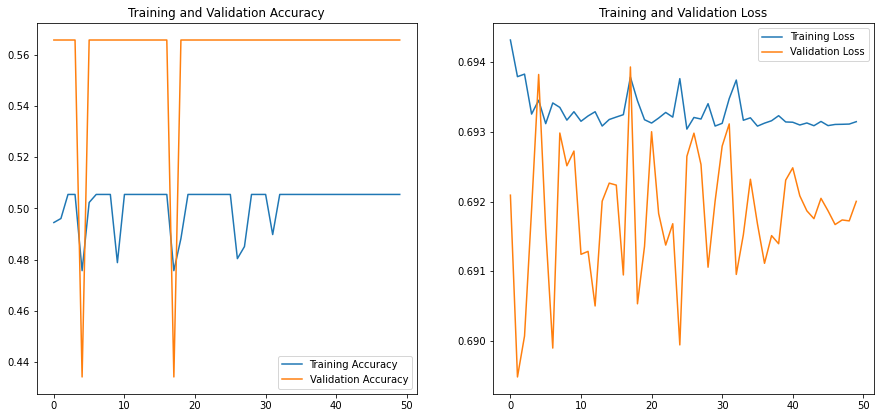

In [28]:
print("Model -1 Perfromance:")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocab_size,128,input_length=(maxlen)))
model_lstm1.add(LSTM(128 , return_sequences=True))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(LSTM(128,return_sequences=False))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(64, activation = 'relu'))
model_lstm1.add(Dropout(0.2))
model_lstm1.add(Dense(num_classes, activation = 'softmax'))

In [52]:
model_lstm1.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [53]:
history2 = model_lstm1.fit(train_x,train_y,epochs=50,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 9s 565ms/step - loss: 0.6936 - accuracy: 0.4992 - val_loss: 0.6923 - val_accuracy: 0.5660
Epoch 2/50
10/10 [==============================] - 7s 768ms/step - loss: 0.6929 - accuracy: 0.4992 - val_loss: 0.6919 - val_accuracy: 0.5660
Epoch 3/50
10/10 [==============================] - 9s 896ms/step - loss: 0.6936 - accuracy: 0.4961 - val_loss: 0.6919 - val_accuracy: 0.5660
Epoch 4/50
10/10 [==============================] - 10s 966ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6918 - val_accuracy: 0.5660
Epoch 5/50
10/10 [==============================] - 5s 498ms/step - loss: 0.6938 - accuracy: 0.4976 - val_loss: 0.6917 - val_accuracy: 0.5660
Epoch 6/50
10/10 [==============================] - 6s 648ms/step - loss: 0.6939 - accuracy: 0.4945 - val_loss: 0.6918 - val_accuracy: 0.5660
Epoch 7/50
10/10 [==============================] - 9s 905ms/step - loss: 0.6936 - accuracy: 0.4969 - val_loss: 0.6919 - val_accuracy: 0.5660
Epoch

Model -2 Perfromance:


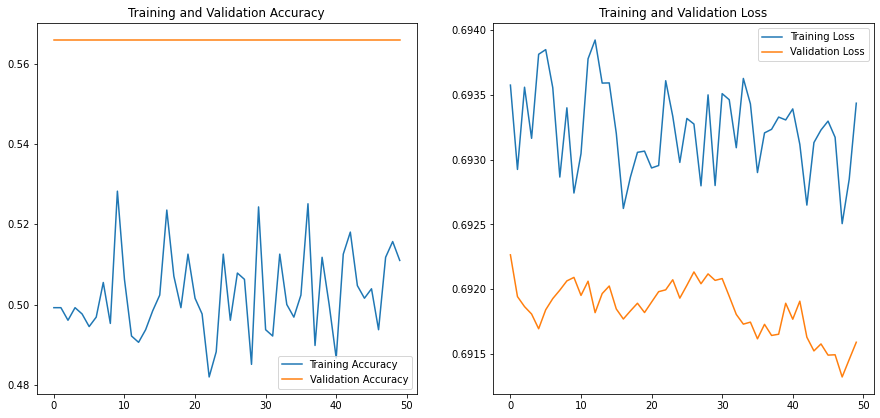

In [55]:
print("Model -2 Perfromance:")
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
a = "Many people lost their friends and families due to corona virus"
a = text_normalisation(a)
a = word_tokenize(a)
a = tokenizer.texts_to_sequences([a])
a = pad_sequences(a, padding='post', maxlen=maxlen)

In [42]:
a.shape

(1, 100)

In [43]:
a = a.reshape(a.shape[0],a.shape[1],1)

In [44]:
a.shape

(1, 100, 1)

In [45]:
model_lstm.predict(a)

array([[0.50447506, 0.4955249 ]], dtype=float32)

In [49]:
pred=np.argmax(model_lstm.predict(a))

In [50]:
encoder.inverse_transform([pred])

array(['Negative'], dtype=object)